In [1]:
import skimage
import skimage.io
import skimage.transform
import skimage.feature
# Import thresholding functions
import skimage.filters

from scipy import ndimage
# Import color.label2rgb
import skimage.color

import napari

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read image and convert to grayscale
file_name = 'tracks.jpg'
img = skimage.io.imread('./data/'+file_name)
img_gray = skimage.color.rgb2gray(img)

In [3]:
img_gray.shape

(370, 1150)

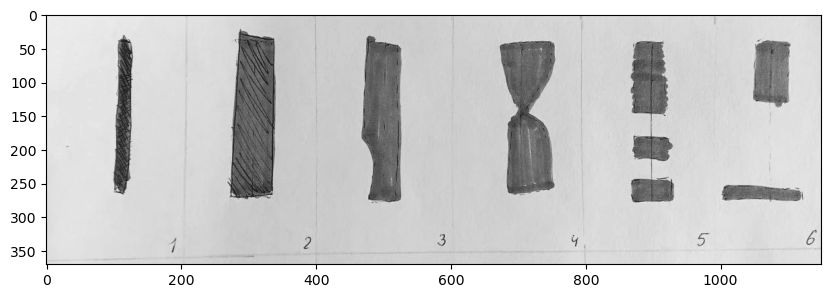

In [4]:
# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(img_gray, cmap='gray')
plt.show()

In [5]:
# Use otzu thresholding to binarize the image
thresh = skimage.filters.threshold_otsu(img_gray)
img_bin = img_gray > thresh
img_bin = ~img_bin

In [6]:
# Erode and dilate to remove noise
iter = 3

img_bin = ndimage.binary_erosion(img_bin, iterations=iter)
img_bin = ndimage.binary_dilation(img_bin, iterations=iter)

In [7]:
# FIll holes in the image using binary closing
img_bin = ndimage.binary_closing(img_bin, iterations=5)

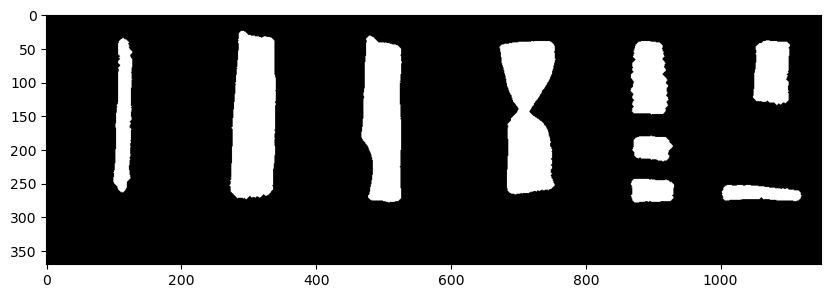

In [8]:
# Plot the binary image
plt.figure(figsize=(10, 10))
plt.imshow(img_bin, cmap='gray')
plt.show()

In [9]:
# Get properties of connected components
cc = skimage.measure.label(img_bin)
props = skimage.measure.regionprops(cc)

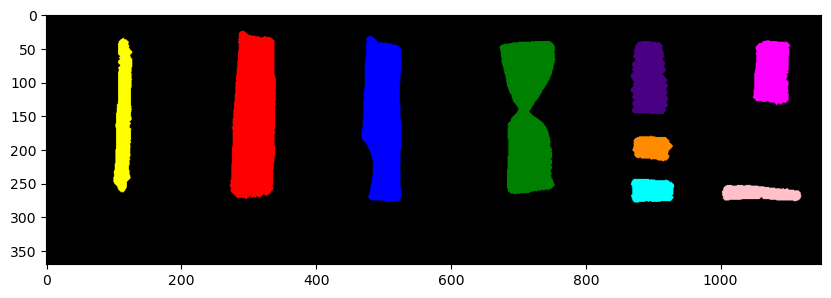

In [10]:
# Plot colored labels
plt.figure(figsize=(10, 10))
plt.imshow(skimage.color.label2rgb(cc, bg_label=0))
plt.show()

In [ ]:
# Push original, binary and labeled images to napari

viewer = napari.Viewer()

viewer.add_image(img, name='Original')
viewer.add_image(img_bin, name='Binary')
viewer.add_labels(cc, name='Labeled')

In [ ]:
np.array(props[0].bbox)

array([ 25, 272, 274, 341])

In [ ]:
print(props[0].bbox)

(25, 272, 274, 341)


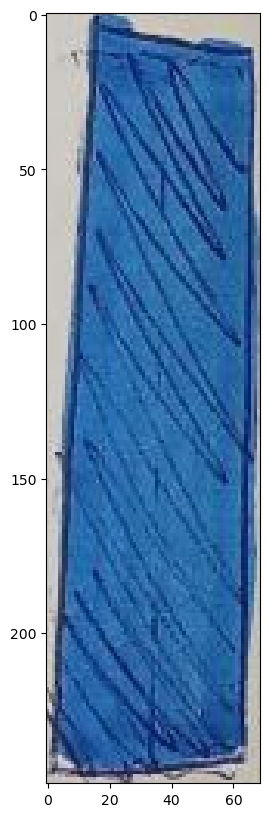

In [ ]:
# Crop and plot the image
plt.figure(figsize=(10, 10))
plt.imshow(img[props[0].bbox[0]:props[0].bbox[2], props[0].bbox[1]:props[0].bbox[3]], cmap='gray')
plt.show()

In [ ]:
# Crop and save each object
# Auto crop
for i in range(len(props)):
    skimage.io.imsave('./data/cropped_auto/' + str(i) + '.png', img[props[i].bbox[0]:props[i].bbox[2], props[i].bbox[1]:props[i].bbox[3]])

In [ ]:
try:
    borders = np.array(viewer.layers[layer_name].data)
    borders_int = borders.astype(int)
    for i, b in enumerate(borders_int):
        # Check if IndexErrors occur
        y_min = min(b[1][0],b[3][0])
        y_max = max(b[1][0],b[3][0])
        x_min = min(b[1][1],b[3][1])
        x_max = max(b[1][1],b[3][1])
        try:
            skimage.io.imsave('./data/cropped_manual/' + str(i+1) + '.png', img[y_min:y_max, x_min:x_max])
        except IndexError:
            print(f"Can't save image #{i}")
            print(f"It's coord in the image are: {b[1][0]}:{b[3][0]}, {b[1][1]}:{b[3][1]}")
except NameError:
    layer_name = input("Please enter the name of the layer with the rectangles: ")
    # Create a shape layer in napari
    viewer.add_shapes(name=layer_name, shape_type='rectangle', edge_color='red', edge_width=2)